## Datos externos de la ciudad

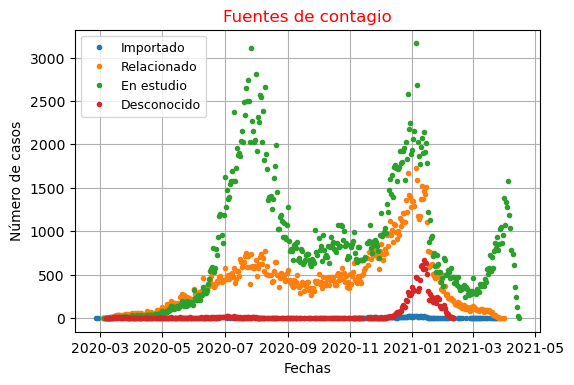

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de Salud Data
Casos = pd.read_csv("Datos/osb_enftransm-covid-19_17042021.csv", 
                       nrows=732872, encoding='latin-1', delimiter=";")

# Renombrando columnas
Casos.rename(columns={"FECHA_DE_INICIO_DE_SINTOMAS":'fechas',
                     'FUENTE_O_TIPO_DE_CONTAGIO':'fuente'}, inplace=True)

# Convirtiendo en formato fecha de pandas
Casos["fechas"] = pd.to_datetime(Casos["fechas"], format="%d/%m/%Y")  # to DateTime
Casos["fuente"] = Casos["fuente"].apply(lambda x: "En estudio" if x=="En Estudio" else x)

# Encontrando fuentes de contagio
casos = Casos.groupby(['fuente', 'fechas']).size()

# Graficando:
tipo_fuente = ['Importado', 'Relacionado', 'En estudio', 'Desconocido']
#tipo_fuente = ['Importado']
plt.figure(figsize=(6,4), dpi=100)
for i in tipo_fuente:
    plt.plot(casos[i], '.', label=i)
plt.title("Fuentes de contagio", color="r")
plt.xlabel("Fechas")
plt.ylabel("Número de casos")
plt.legend(fontsize=9)
plt.grid()